# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from crypto_bot.utils import save_obj, load_obj
from crypto_bot.simulation import TorchTradingNet, SickitLearnTradingModel, BuyModelLossLimitTrader, Simulator
from crypto_bot.model.data import plot_df_interactive

DATA_FOLDER = 'C:/Users/diego/crypto_bot/data'
WEIGHTS_PATH = 'C:/Users/diego/crypto_bot/data/models'

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load Data

In [2]:
valid_ds_name = '{}/data_loaders/valid_nn_15m_v1.ds'.format(DATA_FOLDER)

# Load
valid_dataset = load_obj(valid_ds_name)
# valid_dataset = valid_dataset[valid_dataset.Date >= '2022-01-06']
valid_dataset.to(DEVICE)

# Load models

In [3]:
model = load_obj(WEIGHTS_PATH + '/net3.pickle')
model.to(DEVICE)

ConvBotBinary(
  (conv1): Conv1d(16, 24, kernel_size=(4,), stride=(1,), padding=same)
  (bn1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do1): Dropout(p=0.5, inplace=False)
  (conv2): Conv1d(24, 48, kernel_size=(8,), stride=(1,), padding=same)
  (bn2): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do2): Dropout(p=0.5, inplace=False)
  (conv3): Conv1d(48, 48, kernel_size=(6,), stride=(1,), padding=same)
  (bn3): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=48, out_features=1, bias=True)
)

# Simulate model

In [9]:
from crypto_bot.binance.data_utils import download_data, load_dataframe
eval_full_ds = load_dataframe(DATA_FOLDER, '2022-01-01', '2022-04-01', interval='5m')
eval_full_ds = eval_full_ds[96:]

In [12]:
eval_full_ds.shape

(34464, 14)

In [13]:
len(valid_dataset)

34425

In [11]:
t_model = TorchTradingNet(model)
trader = BuyModelLossLimitTrader(t_model, 0.7, 0.625, 1, 0.2)
simulator = Simulator(valid_dataset, 1000, trader, df=False, sup_df=eval_full_ds)
simulator.simulate()

C:\Users\diego\anaconda3\envs\crypto_bot\lib\site-packages\torch\nn\modules\conv.py:297: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  ..\aten\src\ATen\native\Convolution.cpp:647.)
  return F.conv1d(input, weight, bias, self.stride,


2022-01-04 14:50:00 Price: 47445.4 Bought: 0.021061051229413177 ($1000)
2022-01-04 14:55:00 Price: 47333.38 Sold: 0.021061051229413177 ($996.1430729855)
2022-01-05 20:05:00 Price: 44100.98 Bought: 0.022570835516144104 ($996.1430729855)
2022-01-05 20:55:00 Price: 43967.01 Sold: 0.022570835516144104 ($991.627871733528)
2022-01-05 21:00:00 Price: 44111.08 Bought: 0.022463384501801537 ($991.627871733528)
2022-01-05 21:20:00 Price: 44004.0 Sold: 0.022463384501801537 ($987.7374125385619)
2022-01-05 21:25:00 Price: 43968.13 Bought: 0.0224480006195205 ($987.7374125385619)
2022-01-05 21:30:00 Price: 43561.38 Sold: 0.0224480006195205 ($977.1324858132474)
2022-01-05 21:35:00 Price: 43603.47 Bought: 0.022392704902818226 ($977.1324858132474)
2022-01-05 22:10:00 Price: 43359.46 Sold: 0.022392704902818226 ($970.2073908311565)
2022-01-05 22:15:00 Price: 43215.1 Bought: 0.02243381908842125 ($970.2073908311565)
2022-01-05 22:25:00 Price: 43000.01 Sold: 0.02243381908842125 ($963.9309543064494)
2022-01-05

In [19]:
# t_model = SickitLearnTradingModel(model)
# trader = BuyModelLossLimitTrader(t_model, 0.65, 0.5, target_profit=1, loss_limit=0.2)
# simulator = Simulator(valid_dataset.copy().reset_index(drop=True), 1000, trader)
# simulator.simulate()

2022-01-02 04:00:00 Price: 46910.3 Bought: 0.02130129204034082 ($1000)
2022-01-02 17:00:00 Price: 47401.14 Sold: 0.02130129204034082 ($1008.9482470404421)
2022-01-03 03:00:00 Price: 46793.26 Bought: 0.021545657127867594 ($1008.9482470404421)
2022-01-03 15:00:00 Price: 46693.45 Sold: 0.021545657127867594 ($1005.2865330193662)
2022-01-03 20:00:00 Price: 45922.0 Bought: 0.021874756502756883 ($1005.2865330193662)
2022-01-04 08:00:00 Price: 46489.73 Sold: 0.021874756502756883 ($1016.1888099861901)
2022-01-04 18:00:00 Price: 45750.0 Bought: 0.022195118434507114 ($1016.1888099861901)
2022-01-04 21:00:00 Price: 46221.89 Sold: 0.022195118434507114 ($1025.1308975746474)
2022-01-06 09:00:00 Price: 42597.87 Bought: 0.02404725986068004 ($1025.1308975746474)
2022-01-06 20:00:00 Price: 43221.5 Sold: 0.02404725986068004 ($1038.579123086831)
2022-01-07 15:00:00 Price: 41319.11 Bought: 0.02511671206723755 ($1038.579123086831)
2022-01-07 21:00:00 Price: 41875.01 Sold: 0.02511671206723755 ($1050.973747055

In [ ]:
# ($2136.0695025748264)

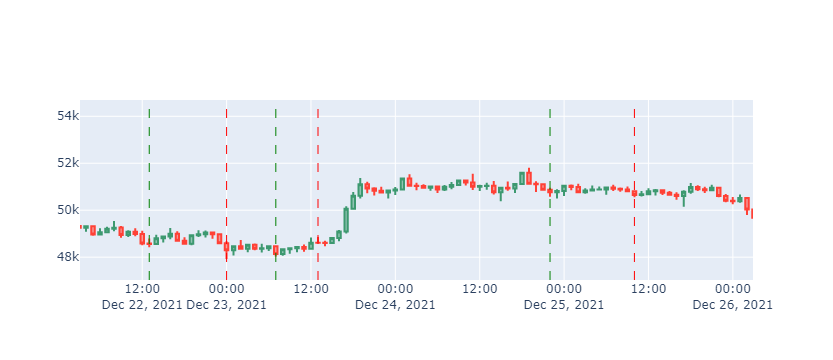

In [56]:
import plotly.graph_objects as go

sub = simulator.ds
fig = plot_df_interactive(sub)

vlines = {'buy_orders': 'green', 'sell_orders': 'red'}
for col, color in vlines.items():
    for d in sub[~sub[col].isna()]['Date']:
        fig.add_vline(x=d, line_width=1, line_dash="dash", line_color=color)
fig.show()